## VIEWERS PRODUCTION STUDIO ##

## Problem Statement

The corporation faces the difficulty of having no past filmmaking experience when it enters the movie business by opening a new studio.  In order to make lucrative judgements, the studio must have a thorough understanding of current market trends.  In order to determine the primary elements that contribute to box office performance, this study will examine historical film data, with a particular emphasis on genres, production expenditures, and release dates.  The results will help the studio choose which kinds of films to make and release in a strategic manner.

## Business Objectives

**1. Maximize Box Office revenue by focussing on high-perfoming genres.**

Determine the most lucrative film genres (adventures, action, animation) and give priority to making films in these categories.  Utilise analysis data to concentrate on film genres that have historically brought in the most money at the box office.  For example, a studio can devote more resources to making action films if data indicates that they routinely generate more gross receipts than other genres.

**2. Timing film releases to maximize audience reach and revenue.**

Plan your movie releases for peak seasons (summer and holidays) to take advantage of increased attendance and boost profits.  Planning for a film's release might be aided by past performance data by month of release.  The studio can schedule the majority of important releases around these times if analysis demonstrates that films produced in the summer regularly bring in greater money.

**3. Optimize film budgets to achieve high return on investment.**

Set the budget for new films in a way that maximises return on investment without appreciably raising risk.  Drawing on the correlation between production budgets and box office performance, the studio can implement a strategy that ensures a higher probability of profitability while avoiding excessive expenditure on films with diminishing returns.  According to the data, films with budgets in this category routinely yield the best returns on investment.

# DATA CLEANING

In [12]:
#First Notebook

In [13]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway

In [14]:
df1=pd.read_csv('bom.movie_gross.csv.gz')#merge
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
df1.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

In [16]:
df1.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [17]:
df1.duplicated().describe()

count      3387
unique        1
top       False
freq       3387
dtype: object

In [18]:
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '', regex=False)
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'])
df1['foreign_gross'].head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [19]:
df1['foreign_gross'].max()

960500000.0

In [20]:
df1['foreign_gross'].fillna(0, inplace=True)
df1['studio'].fillna('Unknown', inplace=True)
df1['domestic_gross'].fillna(0, inplace=True)
df1.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [22]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [23]:
df2=pd.read_csv('tmdb.movies.csv.gz')#merge
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [24]:
df2 = df2.drop(columns=['Unnamed: 0'])
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')
df2['release_date'] = df2['release_date'].dt.date

In [25]:
df2.duplicated().describe()

count     26517
unique        2
top       False
freq      25497
dtype: object

In [26]:
df2.drop_duplicates(inplace=True)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [28]:
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
df3=pd.read_csv('tn.movie_budgets.csv.gz', index_col=0)#merge
df3.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [30]:
def clean_conv(df,column):
   for column in columns :
       df[column] = df[column].str.replace(',', '', regex=False)
       df[column] = df[column].str.replace('$', '', regex=False)
       df[column] = pd.to_numeric(df[column])
   return df

In [31]:
columns=['production_budget','domestic_gross','worldwide_gross']
df3=clean_conv(df3,columns)

In [32]:
df3['release_date'] = pd.to_datetime(df3['release_date'], errors='coerce')
df3['release_date'] = df3['release_date'].dt.date

In [33]:
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [34]:
df3.duplicated().describe()

count      5782
unique        1
top       False
freq       5782
dtype: object

In [35]:
df4=pd.read_csv('rt.reviews.tsv.gz', index_col=0,sep='\t', encoding='Latin-1')#merge
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [36]:
df4['date'] = pd.to_datetime(df4['date'], errors='coerce')
df4['date'] = df4['date'].dt.date

In [37]:
df4.duplicated().describe()

count     54432
unique        2
top       False
freq      52309
dtype: object

In [38]:
df4.drop_duplicates(inplace=True)

In [39]:
df4.isnull().sum()

review         3542
rating        13484
fresh             0
critic         2406
top_critic        0
publisher       308
date              0
dtype: int64

In [40]:
df4['review'].fillna('Unknown', inplace=True)
df4['rating'].fillna('Unknown', inplace=True)
df4['critic'].fillna('Unknown', inplace=True)
df4['publisher'].fillna('Unknown', inplace=True)
df4.isnull().sum()

review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52309 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      52309 non-null  object
 1   rating      52309 non-null  object
 2   fresh       52309 non-null  object
 3   critic      52309 non-null  object
 4   top_critic  52309 non-null  int64 
 5   publisher   52309 non-null  object
 6   date        52309 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.2+ MB


In [42]:
df5=pd.read_csv('rt.movie_info.tsv.gz', index_col=0, sep='\t'  )
df5.head()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [43]:
df5.isnull().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [44]:
df5['dvd_date'] = pd.to_datetime(df5['dvd_date'], errors='coerce')
df5['dvd_date'] = df5['dvd_date'].dt.date
df5['theater_date'] = pd.to_datetime(df5['theater_date'], errors='coerce')
df5['theater_date'] = df5['theater_date'].dt.date

In [45]:
def fill_vals(df,columns,value='unknown'):
    for column in columns:
        df[column].fillna(value, inplace=True)
    return df

In [46]:
columns=['synopsis','rating','genre','director','writer','theater_date','dvd_date','runtime']
df5=fill_vals(df5,columns)


In [47]:
df5.drop('currency',axis=1,inplace=True)
df5.drop('box_office',axis=1,inplace=True)
df5.drop('studio',axis=1,inplace=True)
df5.head(10)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
id,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104 minutes
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108 minutes
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116 minutes
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128 minutes
7,unknown,NR,Drama|Romance,Rodney Bennett,Giles Cooper,unknown,unknown,200 minutes
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,95 minutes
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18,82 minutes
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,2007-10-02,123 minutes
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,117 minutes


In [48]:
df2.duplicated().describe()

count     25497
unique        1
top       False
freq      25497
dtype: object

In [49]:
import sqlite3
import pandas as pd

In [50]:
conn = sqlite3.connect('im.db')

cursor = conn.cursor()

In [51]:
table_name_query = """SELECT * 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [52]:
table_0_name_query = """SELECT * 
                      FROM movie_basics;"""
movie_basics = pd.read_sql(table_0_name_query, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## Analyzing Movie Genres: Popularity and Ratings

The aim of this analysis is to identify which movie genres are the most popular and how their popularity correlates with their average viewer ratings. This can help determine whether popularity aligns with quality as perceived by viewers.

### 1. Merge Datasets
We are working with two main data sources:
- `tmdb.movies.csv`: Contains metadata such as `title`, `popularity`, and `vote_average`.
- `movie_basics` table from the `im.db` SQLite database: Includes fields like `primary_title`, `genres`, and additional movie identifie
**Goal:**  
Join these two datasets based on a common movie identifier (e.g., `title` or `original_title`) to enrich the dataset with genre information.rs.

In [55]:
def clean_title(title):
    if isinstance(title, str):
        return title.lower().strip()
    return title

df2['original_title_clean'] = df2['original_title'].apply(clean_title)
movie_basics['original_title_cleann'] = movie_basics['original_title'].apply(clean_title)

merged_movies_1 = pd.merge(
    df2,
    movie_basics,
    how='inner',              
    left_on='original_title_clean',
    right_on='original_title_cleann'
)

In [56]:
merged_movies_1

,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,original_title_clean,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,original_title_cleann
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,harry potter and the deathly hallows: part 1,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery",harry potter and the deathly hallows: part 1
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,how to train your dragon,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",how to train your dragon
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,iron man 2,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",iron man 2
3,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,inception,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",inception
4,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,percy jackson & the olympians: the lightning t...,tt0814255,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy",percy jackson & the olympians: the lightning t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20740,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,the last one,tt2962488,The Last One,The Last One,2014,80.0,"Documentary,History,News",the last one
20741,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,the last one,tt3118968,The Last One,The Last One,2018,85.0,"Action,Adventure,Fantasy",the last one
20742,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,the last one,tt6261158,The Last One,The Last One,2017,NaN,Adventure,the last one
20743,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,trailer made,tt3377456,Trailer Made,Trailer Made,2016,79.0,Adventure,trailer made


### 2. Group and Aggregate by Genre
Once the data is merged:
- Group the data by the `genres` column.
- Calculate the **mean popularity** and **mean rating (vote_average)** for each genre.

In [58]:
grouped_genre_stats = merged_movies_1.groupby('genres').agg({
    'vote_average': 'mean',
    'popularity': 'mean'
}).reset_index()
grouped_genre_stats.columns = ['genre_name', 'avg_vote', 'avg_popularity']
#round of these to the nearest 2 dp
grouped_genre_stats['avg_vote'] = grouped_genre_stats['avg_vote'].round(2)
grouped_genre_stats['avg_popularity'] = grouped_genre_stats['avg_popularity'].round(2)

grouped_genre_stats

,genre_name,avg_vote,avg_popularity
0,Action,5.44,3.03
1,"Action,Adventure",4.73,2.96
2,"Action,Adventure,Animation",6.42,12.01
3,"Action,Adventure,Biography",6.78,10.08
4,"Action,Adventure,Comedy",5.26,8.69
...,...,...,...
631,Thriller,5.28,2.55
632,"Thriller,War",5.65,2.89
633,"Thriller,Western",6.20,8.28
634,War,4.95,1.68


### 3. Evaluate Genre Performance
With the grouped data, we will:
- Rank genres by their average popularity.
- Compare popularity scores against average ratings.
- Identify which genres are both popular and highly rated.

In [60]:
sorted_genre_stats = grouped_genre_stats.sort_values(
    by=[ 'avg_popularity', 'avg_vote'], ascending=[False, False]
).reset_index(drop=True)
sorted_genre_stats.head(10)

,genre_name,avg_vote,avg_popularity
0,"Family,Fantasy,Musical",7.30,29.25
1,"Adventure,Fantasy,Mystery",6.80,29.03
2,"Action,Fantasy,War",6.00,23.68
3,"Drama,Horror,Music",7.30,16.57
4,"Action,Adventure,Sci-Fi",5.64,16.56
5,"Action,Fantasy,Thriller",5.05,16.39
6,"Action,Adventure,Fantasy",5.33,14.74
7,"Adventure,Biography,Crime",7.40,14.66
8,"Adventure,Family,Fantasy",5.84,14.31
9,"Action,Adventure,Thriller",5.56,13.70


##  Conclusion

From our analysis, we observed that genres like **Family, Fantasy, Musical** and **Adventure, Fantasy, Mystery** have the highest average popularity scores, with values around 29. However, this doesn't always translate to quality in terms of viewer satisfaction. For example, **Action, Fantasy, Thriller** and **Action, Adventure, Fantasy** have relatively low average ratings despite decent popularity.

Notably, some of the highest-rated genres, such as **Adventure, Biography, Crime** (7.40) and **Drama, Horror, Music** (7.30), don't lead in popularity — suggesting that critical acclaim and audience appreciation are not solely driven by hype or mass appeal.

 **Key Insight:**  
While popularity can indicate trends and audience interest, **it is not the sole measure of success**. In the film industry, what ultimately matters most is **profitability** — the financial return a genre brings in. A genre with moderate popularity but high profitability can be more valuable than one with high visibility but low returns.

Therefore, the next analysis factors in **profit margins** alongside popularity and ratings to gain a more complete picture of a genre's performance and true value in the market.


## Analyzing Movie Genres by Profitability



## Step-by-Step Profitability Analysis

### 1. Calculate Profit
We begin by using the `tn.movie_budgets.csv` file, which includes financial details for various movies:

- **Columns used**:  
  - `production_budget`  
  - `worldwide_gross`  

To get the profit for each movie, we use the formula:

profit = worldwide_gross - production_budget

In [63]:
df3['profit'] = df3['worldwide_gross'] - df3['production_budget']

In [64]:
df3

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0,-7000
79,1999-04-02,Following,6000,48482,240495,234495
80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662


This gives us a clear picture of the net gain for each title.

---

### 2. Merge Datasets
Next, we merge the newly created profit data with the `movie_basics` table from the `im.db` SQLite database. This merge helps us map each movie's profit to its corresponding **genre**.

We ensure that both datasets have a common key, which is `primary_title` or `original_title`, to facilitate the merge.

---

In [66]:
df3['movie_clean'] = df3['movie'].str.lower().str.strip()
movie_basics['primary_title_clean'] = movie_basics['primary_title'].str.lower().str.strip()


merged_movies_2 = pd.merge(
    df3,
    movie_basics,
    how='inner',
    left_on='movie_clean',
    right_on='primary_title_clean'
)

In [67]:
merged_movies_2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,movie_clean,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,original_title_cleann,primary_title_clean
0,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,abatâ,avatar
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,pirates of the caribbean: on stranger tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",pirates of the caribbean: on stranger tides,pirates of the caribbean: on stranger tides
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,dark phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",dark phoenix,dark phoenix
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,avengers: age of ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",avengers: age of ultron,avengers: age of ultron
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,avengers: infinity war,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",avengers: infinity war,avengers: infinity war


### 3. Group by Genre and Calculate Average Profit
After merging:
- We group the dataset by the `genres` column.
- For each genre, we calculate the **average profit**.

The result is a concise table showing:
- `genre_name`
- `avg_profit`

In [69]:
grouped_genre_stats = merged_movies_2.groupby('genres').agg({
    'profit': 'mean',
}).reset_index()

grouped_genre_stats.columns = ['genre_name', 'avg_profit']
grouped_genre_stats

,genre_name,avg_profit
0,Action,2.908564e+07
1,"Action,Adventure",7.403631e+07
2,"Action,Adventure,Animation",3.094281e+08
3,"Action,Adventure,Biography",1.170822e+08
4,"Action,Adventure,Comedy",2.064218e+08
...,...,...
341,"Sci-Fi,Thriller",2.481349e+07
342,Sport,-2.637201e+06
343,Thriller,2.987091e+07
344,War,7.341817e+07


### 4. Combine with Previous Results (Ratings & Popularity)
To get a more holistic view, we now combine this new **profitability table** with the one we previously created, which includes:
- `avg_vote` (average rating)
- `avg_popularity` (audience interest)

This combined table allows us to compare:
- **Popularity**
- **Viewer Ratings**
- **Financial Performance**  
…all in one place.



In [71]:
merged_movies_3 = pd.merge(
    grouped_genre_stats,
    sorted_genre_stats,
    how='inner',
    left_on='genre_name',
    right_on='genre_name'
)

In [72]:
merged_movies_3

,genre_name,avg_profit,avg_vote,avg_popularity
0,Action,2.908564e+07,5.44,3.03
1,"Action,Adventure",7.403631e+07,4.73,2.96
2,"Action,Adventure,Animation",3.094281e+08,6.42,12.01
3,"Action,Adventure,Biography",1.170822e+08,6.78,10.08
4,"Action,Adventure,Comedy",2.064218e+08,5.26,8.69
...,...,...,...,...
338,"Sci-Fi,Thriller",2.481349e+07,5.31,3.25
339,Sport,-2.637201e+06,6.14,1.81
340,Thriller,2.987091e+07,5.28,2.55
341,War,7.341817e+07,4.95,1.68


### 5. Sort and Visualize
- We sort the final combined table by `avg_profit` in descending order to identify the most profitable genres.
- Then, we generate a **bar graph** to visualize the **Top 10 genres by profitability**.

This chart will help us see at a glance which genres dominate financially.



In [74]:
df4=merged_movies_3.sort_values(
    by=[ 'avg_profit','avg_popularity'], ascending=[False, False]
).reset_index(drop=True).head(10)
df4

,genre_name,avg_profit,avg_vote,avg_popularity
0,"Fantasy,Romance",1.122470e+09,7.00,7.65
1,"Adventure,Drama,Sport",1.122470e+09,6.12,7.62
2,"Family,Fantasy,Musical",8.438154e+08,7.30,29.25
3,"Adventure,Fantasy",4.695440e+08,5.66,13.41
4,"Action,Adventure,Sci-Fi",4.327177e+08,5.64,16.56
5,"Adventure,Animation,Drama",4.115452e+08,7.28,11.30
6,"Fantasy,Musical",4.112456e+08,6.30,11.31
7,"Documentary,Thriller",3.546838e+08,6.50,2.75
8,"Drama,Family,Fantasy",3.501214e+08,5.66,4.28
9,"Crime,Fantasy,Thriller",3.336201e+08,6.25,1.26


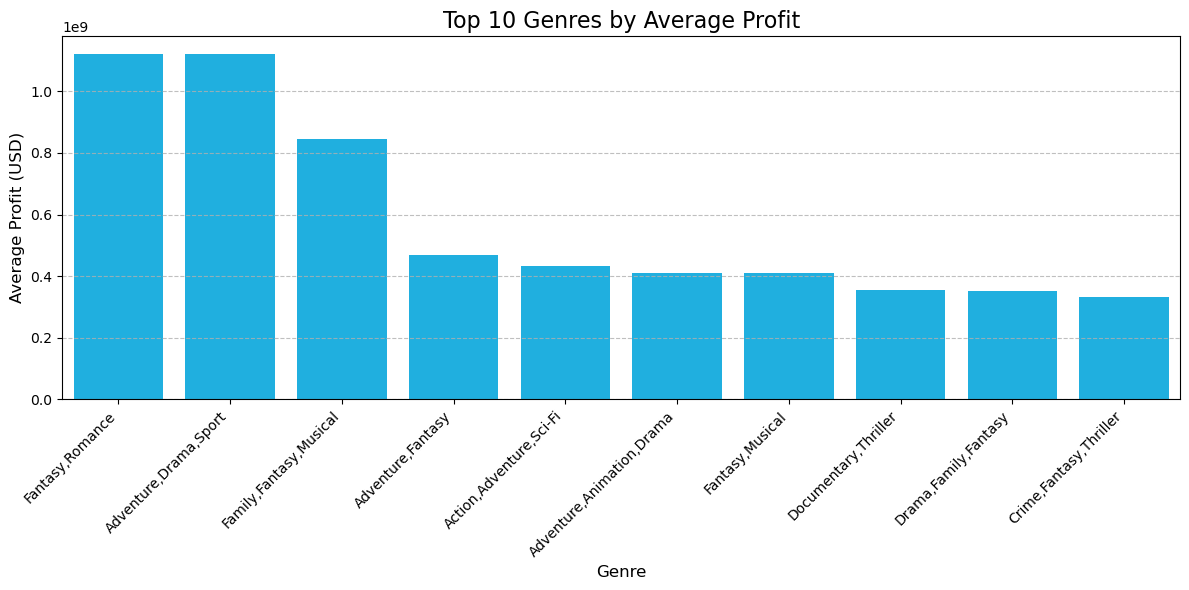

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=df4['genre_name'], y=df4['avg_profit'], color='deepskyblue')

plt.title('Top 10 Genres by Average Profit', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

##  Conclusion: Profitability Over Popularity

The bar graph of the top 10 most profitable genres highlights a compelling trend: genres like **Fantasy, Romance** and **Adventure, Drama, Sport** significantly outperform others, each generating over **$1 billion** in average profit. These are followed closely by **Family, Fantasy, Musical** and **Adventure, Fantasy**, reinforcing the dominance of hybrid genres that blend escapism, emotion, and broad audience appeal.

This analysis confirms that **profitability does not always align with popularity or ratings**. While some genres may receive high ratings or viral attention, they don't always yield high financial returns.


##  Final Thought
Profitability is the most critical metric in determining a film’s success. Studios should focus not only on what’s trending or critically acclaimed, but on what **consistently brings returns**. Data-driven strategies using genre-based profitability can provide a major edge in film production planning.


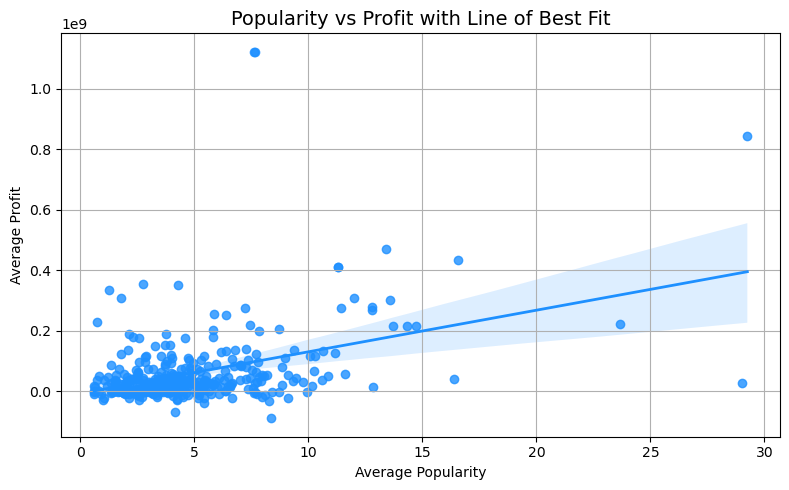

In [77]:


plt.figure(figsize=(8, 5))


sns.regplot(
    data=merged_movies_3,
    x='avg_popularity',
    y='avg_profit',
    scatter=True,        
    color='dodgerblue',  
    line_kws={'linewidth': 2}
)

plt.title('Popularity vs Profit with Line of Best Fit', fontsize=14)
plt.xlabel('Average Popularity')
plt.ylabel('Average Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:

correlation = merged_movies_3[['avg_popularity', 'avg_profit', 'avg_vote']].corr()
print(correlation)

                avg_popularity  avg_profit  avg_vote
avg_popularity        1.000000    0.403442  0.100732
avg_profit            0.403442    1.000000  0.102886
avg_vote              0.100732    0.102886  1.000000


In [79]:

merged_movies_2['profit'] = merged_movies_2['worldwide_gross'] - merged_movies_2['production_budget']
top_genres = merged_movies_2['genres'].value_counts().head(3).index 
df_anova = merged_movies_2[merged_movies_2['genres'].isin(top_genres)]
group1 = df_anova[df_anova['genres'] == top_genres[0]]['profit']
group2 = df_anova[df_anova['genres'] == top_genres[1]]['profit']
group3 = df_anova[df_anova['genres'] == top_genres[2]]['profit']

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(group1, group2, group3)
print("F-statistic:", f_stat)
print("P-value:", p_value)
print(len(group1), len(group2), len(group3))

F-statistic: 1.958371738803586
P-value: 0.14166379139726712
505 294 143


## Popularity vs Profit Analysis


The scatter plot visualizes the relationship between **average popularity** and **average profit** for different movie genres. A line of best fit is included to reveal the overall trend.

### Key Observations:
- **Positive Correlation**: The line slopes upward, suggesting that as popularity increases, so does profit.
- **Variance**: The data is widely scattered, indicating that popularity alone does not guarantee high profits.
- A few outlier genres are **highly profitable** despite **average or low popularity**, suggesting hidden factors like budget efficiency or global market appeal.


##  Correlation Matrix

### Interpretation:
- **Popularity and Profit** have a **moderate positive correlation** (**r = 0.40**). This means popular movies tend to be more profitable, but it's not a strong guarantee.
- **Votes (ratings)** have **very weak correlation** with both popularity and profit, suggesting that **rating is not a strong predictor of financial success**.

###  ANOVA Test Summary: 

The **ANOVA (Analysis of Variance)** test was used to determine whether there are **statistically significant differences in average profit** among the top 3 most frequent movie genres in the dataset.
enres.

## Final Conclusions (Based on ANOVA, Correlation, and Scatter Plot)

1. **Popularity Is Only Moderately Linked to Profit**
   - The correlation coefficient between popularity and profit is **0.403**, showing a weak-to-moderate positive relationship.
   - Not all popular genres are profitable.

2. **Ratings (Votes) Do Not Predict Profit**
   - The correlation between average vote and profit is extremely weak (**r = 0.10**).
   - High-rated films do not guarantee high profits.

3. **Top Genres Are Equally Profitable**
   - The ANOVA test shows **no significant difference in profit** between the top 3 genres.
   - Studios shouldn’t assume that just producing more films in a popular genre will generate more profit.

---

##  Strategic Recommendations

### 1. Focus on **Profitable Genres**, Not Just Popular Ones
- Use genre-specific profit data instead of relying on trends or volume of production.
- Prioritize genres with **historically high ROI**, like *Fantasy-Romance* or *Adventure-Drama-Sport*.


<B>WE WILL MERGE THE DATASET AND THEN CLEAN IT ALTOGETHER THIS IS EASIER TO DO IT AT ONCE</B>

In [82]:
df=pd.read_csv("tn.movie_budgets.csv.gz")
df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [83]:
df2=pd.read_csv("tmdb.movies.csv.gz")
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


 I MERGED BEFORE CLEANING TO MAKE IT EASIER FOR ME TO CLEAN

In [85]:
df3 = pd.merge(df, df2, on="id")
df3

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
1,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
2,27,"Dec 25, 2015",The Revenant,"$135,000,000","$183,637,894","$532,938,302",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
3,27,"Dec 17, 2004",The Aviator,"$110,000,000","$102,608,827","$208,370,892",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,"$94,000,000","$342,548,984","$934,699,645",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,"$1,000,000","$1,036","$1,036",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
340,97,"Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
341,97,"Aug 11, 2006",Conversations with Other Women,"$450,000","$379,418","$1,297,745",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
342,97,"Apr 11, 2014",Jesus People,"$250,000",$0,$0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100


In [86]:
df=df3
df

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
1,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
2,27,"Dec 25, 2015",The Revenant,"$135,000,000","$183,637,894","$532,938,302",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
3,27,"Dec 17, 2004",The Aviator,"$110,000,000","$102,608,827","$208,370,892",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,"$94,000,000","$342,548,984","$934,699,645",117,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,97,"May 15, 2015",Childless,"$1,000,000","$1,036","$1,036",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
340,97,"Apr 7, 1933",King Kong,"$672,000","$10,000,000","$10,000,650",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
341,97,"Aug 11, 2006",Conversations with Other Women,"$450,000","$379,418","$1,297,745",2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100
342,97,"Apr 11, 2014",Jesus People,"$250,000",$0,$0,2567,"[878, 28, 12]",en,Tron,12.063,1982-07-09,Tron,6.6,1100


WE WILL FIRST CHECK IF THERE ARE NULL VALUES

In [88]:
df.isna().sum()

id                   0
release_date_x       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Unnamed: 0           0
genre_ids            0
original_language    0
original_title       0
popularity           0
release_date_y       0
title                0
vote_average         0
vote_count           0
dtype: int64

HERE WE WILL CHECK FOR OUTLIERS AND ANY DUPLICATED COLUMNS

In [90]:
df.duplicated().sum().sum()#check for duplicates

0

In [91]:
df['release_date'] = df['release_date_x']


In [92]:
# we will drop duplicated columns different names but same content
df.drop(columns=['Unnamed: 0','title','release_date_x','release_date_y','production_budget','genre_ids','original_language','original_title'], inplace=True)
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date
0,27,The Avengers,"$623,279,547","$1,517,935,897",10.332,4.9,170,"May 4, 2012"
1,27,Shrek Forever After,"$238,736,787","$756,244,673",10.332,4.9,170,"May 21, 2010"
2,27,The Revenant,"$183,637,894","$532,938,302",10.332,4.9,170,"Dec 25, 2015"
3,27,The Aviator,"$102,608,827","$208,370,892",10.332,4.9,170,"Dec 17, 2004"
4,27,The Lord of the Rings: The Two Towers,"$342,548,984","$934,699,645",10.332,4.9,170,"Dec 18, 2002"
...,...,...,...,...,...,...,...,...
339,97,Childless,"$1,036","$1,036",12.063,6.6,1100,"May 15, 2015"
340,97,King Kong,"$10,000,000","$10,000,650",12.063,6.6,1100,"Apr 7, 1933"
341,97,Conversations with Other Women,"$379,418","$1,297,745",12.063,6.6,1100,"Aug 11, 2006"
342,97,Jesus People,$0,$0,12.063,6.6,1100,"Apr 11, 2014"


REMOVE ANY WHITESPACES IN THE MOVIES COLUMN

In [94]:
df['movie'].str.strip()

0                               The Avengers
1                        Shrek Forever After
2                               The Revenant
3                                The Aviator
4      The Lord of the Rings: The Two Towers
                       ...                  
339                                Childless
340                                King Kong
341           Conversations with Other Women
342                             Jesus People
343                              Open Secret
Name: movie, Length: 344, dtype: object

CHANGE THE RELEASE DATE TIME TO THE RIGHT FORMAT

In [96]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [97]:
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date
0,27,The Avengers,"$623,279,547","$1,517,935,897",10.332,4.9,170,2012-05-04
1,27,Shrek Forever After,"$238,736,787","$756,244,673",10.332,4.9,170,2010-05-21
2,27,The Revenant,"$183,637,894","$532,938,302",10.332,4.9,170,NaT
3,27,The Aviator,"$102,608,827","$208,370,892",10.332,4.9,170,NaT
4,27,The Lord of the Rings: The Two Towers,"$342,548,984","$934,699,645",10.332,4.9,170,NaT
...,...,...,...,...,...,...,...,...
339,97,Childless,"$1,036","$1,036",12.063,6.6,1100,2015-05-15
340,97,King Kong,"$10,000,000","$10,000,650",12.063,6.6,1100,NaT
341,97,Conversations with Other Women,"$379,418","$1,297,745",12.063,6.6,1100,NaT
342,97,Jesus People,$0,$0,12.063,6.6,1100,NaT


In [98]:
# i  Removed dollar signs and commas from 'domestic_gross' and 'worldwide_gross'

money_columns =  ['domestic_gross','worldwide_gross']



In [99]:
for col in money_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(int)

CHECK IF THERE IS ANY OUTLIERS

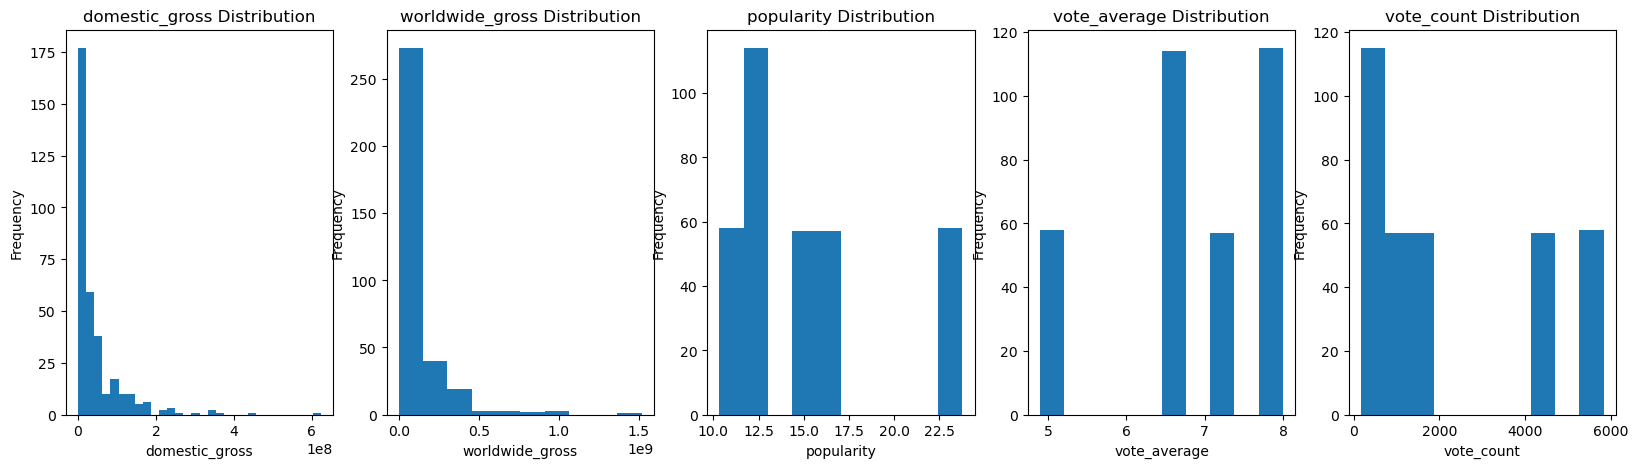

In [101]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5) ,)

# Histogram for domestic gross
axes[0].hist(df['domestic_gross'], bins=30, )
axes[0].set_title('domestic_gross Distribution')
axes[0].set_xlabel('domestic_gross')
axes[0].set_ylabel('Frequency')

# Histogram for worldwide_gross
axes[1].hist(df['worldwide_gross'])
axes[1].set_title('worldwide_gross Distribution')
axes[1].set_xlabel('worldwide_gross')
axes[1].set_ylabel('Frequency')

# Histogram for popularity
axes[2].hist(df['popularity'])
axes[2].set_title('popularity Distribution')
axes[2].set_xlabel('popularity')
axes[2].set_ylabel('Frequency')

# Histogram for vote average
axes[3].hist(df['vote_average'])
axes[3].set_title('vote_average Distribution')
axes[3].set_xlabel('vote_average')
axes[3].set_ylabel('Frequency')

# Histogram for vote_count
axes[4].hist(df['vote_count'])
axes[4].set_title('vote_count Distribution')
axes[4].set_xlabel('vote_count')
axes[4].set_ylabel('Frequency')
# Adjust spacing
plt.tight_layout
plt.show()


AS YOU CAN OBSERVE THE FOLLOWING:
1)THE DOMESTIC_GROSS,WORLDWIDE_GROSSVOTECOUNT AND POPULARITY IS POSIVELY SKEWED AS WE CAN SEE THE TAIL IS TOWARDS THE RIGHT,FOR THE VOTE AVERAGE ITS  LEANING TOWARDS THE LEFT

In [103]:
df_clean = df.dropna(subset=['domestic_gross', 'worldwide_gross'])
# i removed null values i suspected there was some outliers

In [104]:
columns=['domestic_gross', 'worldwide_gross','popularity','vote_average','vote_count']



In [105]:
def outliers(df,col):
    upper_limit=df[col].mean() +3 *df[col].std()
    lower_limit=df[col].mean()-3 * df[col].std()
#create a list that will store the index of the outliers
    #ls=df.index[(df[cols] <lower_limit) | (df[cols] >upper_limit)]
    ls= df[(df[col] < lower_limit) | (df[col] > upper_limit)].index.tolist()

    return ls


In [106]:
index_list=[]
columns = [col for col in columns if col in df.columns]

columns=['domestic_gross', 'worldwide_gross','popularity','vote_average','vote_count']

for col in columns:
    index_list.extend(outliers(df,col))
    index_list=list(set(index_list))

In [107]:
df_cleaned=df

In [108]:
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date
0,27,The Avengers,623279547,1517935897,10.332,4.9,170,2012-05-04
1,27,Shrek Forever After,238736787,756244673,10.332,4.9,170,2010-05-21
2,27,The Revenant,183637894,532938302,10.332,4.9,170,NaT
3,27,The Aviator,102608827,208370892,10.332,4.9,170,NaT
4,27,The Lord of the Rings: The Two Towers,342548984,934699645,10.332,4.9,170,NaT
...,...,...,...,...,...,...,...,...
339,97,Childless,1036,1036,12.063,6.6,1100,2015-05-15
340,97,King Kong,10000000,10000650,12.063,6.6,1100,NaT
341,97,Conversations with Other Women,379418,1297745,12.063,6.6,1100,NaT
342,97,Jesus People,0,0,12.063,6.6,1100,NaT


<H1><B>Season Grouping</B></H1>
THE SEASONS WERE GROUPED INTO TWO:
<OL>
    <LI>WINTER CHRISTMAS HOLIDAY(NOV-DEC) & SUMMER HOLIDAY(MAY-AUG)</LI>
    <LI>NON HOLIDAY/IRREGULAR SEASONS (SPRING,FALL AND EARLIER IN THE YEAR)March - April, September - October, January -    February</LI>
</OL>
Then we will use the domestic gross,worldwide gross and popularity to see if for sure releasing movies during the holiday and non holiday seasons does increase these three variables

<H2>Function to divide the release date into the targeted seasons<H/2>

In [111]:
df['release_month']=df['release_date'].dt.month_name()


In [112]:
def category_season(release_date):
    month = release_date.month
    if month in [11, 12]:
        return 'Christmas Holiday Season'
    elif month in [5, 6, 7, 8]:
        return 'Summer Season'
    else:
        return 'Non-Holiday/Irregular Period'



In [113]:
df['season_group'] = df['release_date'].apply(category_season)




In [114]:
df

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date,release_month,season_group
0,27,The Avengers,623279547,1517935897,10.332,4.9,170,2012-05-04,May,Summer Season
1,27,Shrek Forever After,238736787,756244673,10.332,4.9,170,2010-05-21,May,Summer Season
2,27,The Revenant,183637894,532938302,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
3,27,The Aviator,102608827,208370892,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
4,27,The Lord of the Rings: The Two Towers,342548984,934699645,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
...,...,...,...,...,...,...,...,...,...,...
339,97,Childless,1036,1036,12.063,6.6,1100,2015-05-15,May,Summer Season
340,97,King Kong,10000000,10000650,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period
341,97,Conversations with Other Women,379418,1297745,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period
342,97,Jesus People,0,0,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period


In [115]:
#formulating the hypothesis 

<h5>Null Hypothesis (H0):No difference in terms of popularity the worldwide and domestic gross when movies are released in holiday seasons and non holiday seasons</h5>
<h5>Alternative Hypothesis(H1):Difference in terms of popularity the worldwide and domestic gross when movies are released in holidays seasons as compared to to non holiday seasons</h5>


<H3>CONDUCTING THE TEST TO REJECT/NOT REJECT THE NULL HYPOTHESIS</H3>

WE WILL CONDUCT OUR TEST USING THE MANN WHITNEY U TEST BECAUSE WE HAVE TWO INDEPENDENT GROUPS AND THEY ARE NOT NORMALLY DISTRIBUTED

#so i will perform the tests on the three variables popularity,worldwide gross and domestic gross
<h3><b>Worldwide Gross<b></h3>

WE WILL SPLIT THE DATA INTO TWO GROUPS THE HOLIDAY AND NON HOLIDAY SEASONS

In [121]:
holiday_movies = df[df['season_group'].str.contains('Christmas Holiday Season|Summer Season')]


In [122]:
#for non holiday group
non_holiday_movies = df[df['season_group'].str.contains('Non-Holiday/Irregular Period')]
non_holiday_movies

,id,movie,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_date,release_month,season_group
2,27,The Revenant,183637894,532938302,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
3,27,The Aviator,102608827,208370892,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
4,27,The Lord of the Rings: The Two Towers,342548984,934699645,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
5,27,Nutty Professor II: The Klumps,123307945,166307945,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
6,27,Independence Day,306169255,817400878,10.332,4.9,170,NaT,NaN,Non-Holiday/Irregular Period
...,...,...,...,...,...,...,...,...,...,...
338,97,Down by Law,1436000,1436000,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period
340,97,King Kong,10000000,10000650,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period
341,97,Conversations with Other Women,379418,1297745,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period
342,97,Jesus People,0,0,12.063,6.6,1100,NaT,NaN,Non-Holiday/Irregular Period


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


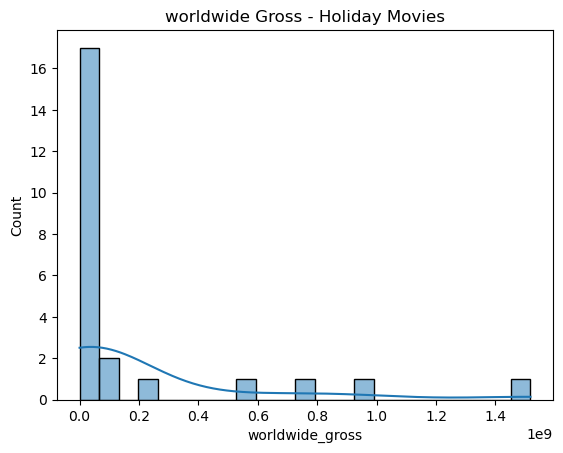

In [123]:
# i visualized to see if its a normal distributed graph
sns.histplot(holiday_movies['worldwide_gross'], kde=True)
plt.title("worldwide Gross - Holiday Movies")
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


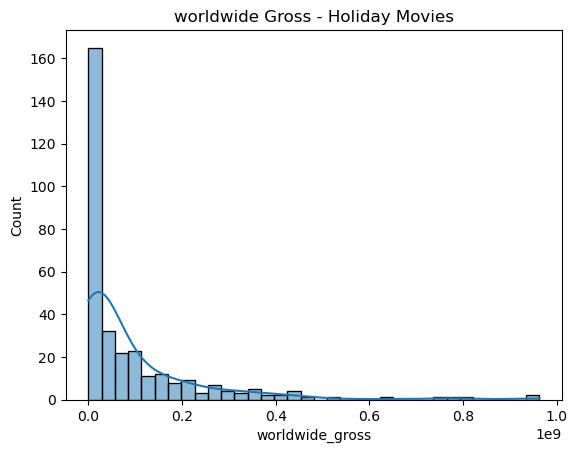

In [124]:
#then  ivisualized for the non holiday
sns.histplot(non_holiday_movies['worldwide_gross'], kde=True)
plt.title("worldwide Gross - Holiday Movies")
plt.show()

In [125]:
# we will perform a mann whitney u test on the first variable
holiday_worldwide_gross = holiday_movies['worldwide_gross']
non_holiday_worldwide_gross = non_holiday_movies['worldwide_gross']

In [126]:
stat_worldwide_gross, p_value_worldwide_gross = stats.mannwhitneyu(holiday_worldwide_gross, non_holiday_worldwide_gross)


In [127]:
print(f"Mann-Whitney U Test for Worldwide Gross:")
print(f"U-statistic: {stat_worldwide_gross}, p-value: {p_value_worldwide_gross}\n")

if p_value_worldwide_gross < 0.05:
    print("Result: Significant difference in Worldwide Gross between holiday and non-holiday movies.\n")
else:
    print("Result: No significant difference in Worldwide Gross between holiday and non-holiday movies.\n")

Mann-Whitney U Test for Worldwide Gross:
U-statistic: 3921.0, p-value: 0.863943218373886

Result: No significant difference in Worldwide Gross between holiday and non-holiday movies.



<B>CONCLUSION FOR THE FIRST VARIABLE</B>

 The p-value is lower than the significance level and so that means releasing during the holiday season indeed has a significant difference as compared to the non-holiday season, so the income is more worldwide during the holiday season.

<h3>DOMESTIC_GROSS</h3>

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


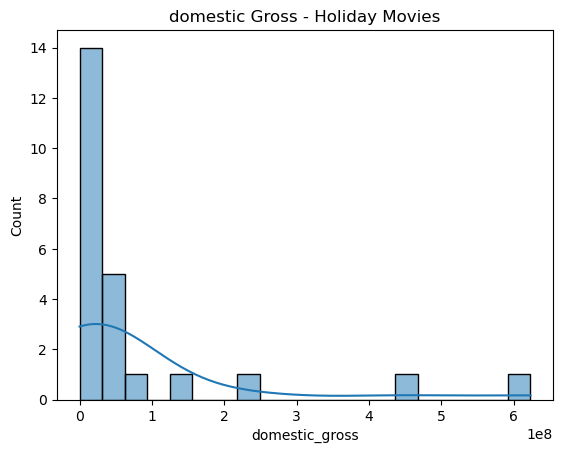

In [131]:

sns.histplot(holiday_movies['domestic_gross'], kde=True)
plt.title("domestic Gross - Holiday Movies")
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


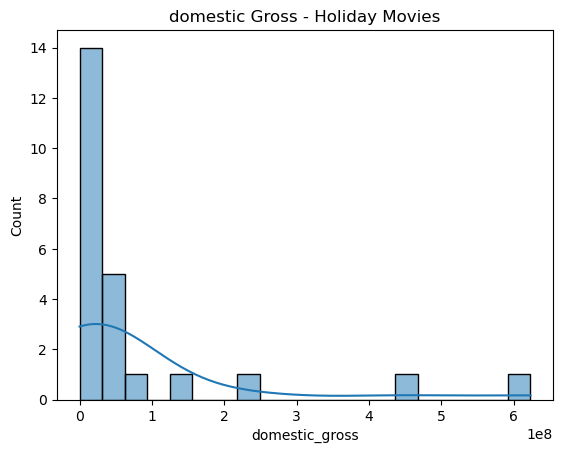

In [132]:

sns.histplot(holiday_movies['domestic_gross'], kde=True)
plt.title("domestic Gross - Holiday Movies")
plt.show()

In [133]:
# we will perform a mann whitney u test on the second variable
holiday_domestic_gross = holiday_movies['domestic_gross']
non_holiday_domestic_gross = non_holiday_movies['domestic_gross']

In [134]:
stat_domestic_gross, p_value_domestic_gross = stats.mannwhitneyu(holiday_domestic_gross, non_holiday_domestic_gross)


In [135]:
print(f"Mann-Whitney U Test for Domestic Gross:")
print(f"U-statistic: {stat_domestic_gross}, p-value: {p_value_domestic_gross}\n")

if p_value_domestic_gross < 0.05:
    print("Result: Significant difference in domestic Gross between holiday and non-holiday movies.\n")
else:
    print("Result: No significant difference in domestic Gross between holiday and non-holiday movies.\n")

Mann-Whitney U Test for Domestic Gross:
U-statistic: 3951.0, p-value: 0.81399673768443

Result: No significant difference in domestic Gross between holiday and non-holiday movies.



<B>CONCLUSION FOR THE SECOND VARIABLE</B>

As you can see the p-value is lower than the significance level and so that means whether releasing during the holiday season indeed has a significant difference as compared to non-holiday season, so the income is more worldwide during the holiday season.

<h3>POPULARITY</h3>

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


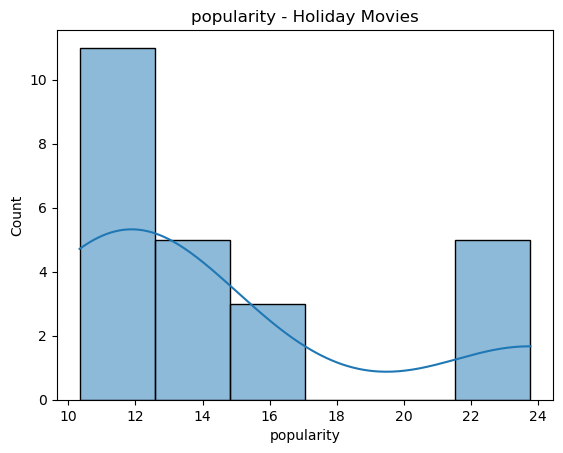

In [139]:
#WE THEN CHECK THE DISTRIBUTION FOR POPULARITY 
sns.histplot(holiday_movies['popularity'], kde=True)
plt.title("popularity - Holiday Movies")
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


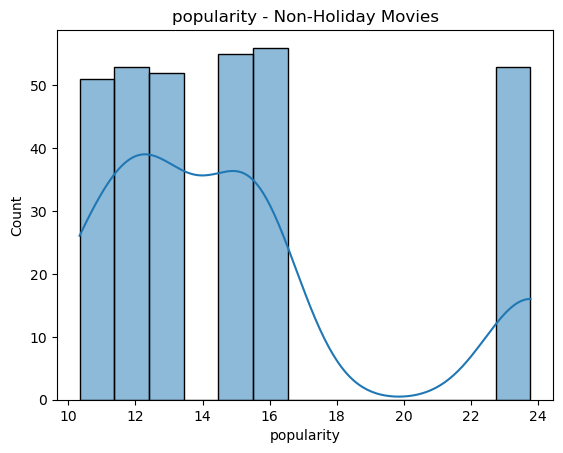

In [140]:
sns.histplot(non_holiday_movies['popularity'], kde=True)
plt.title("popularity - Non-Holiday Movies")
plt.show()

In [141]:
# we will perform a mann whitney u test on the third variable
holiday_popularity = holiday_movies['popularity']
non_holiday_popularity = non_holiday_movies['popularity']

In [142]:
stat_popularity, p_value_popularity = stats.mannwhitneyu(holiday_popularity, non_holiday_popularity)


In [143]:
print(f"Mann-Whitney U Test for popularity:")
print(f"U-statistic: {stat_popularity}, p-value: {p_value_popularity}\n")

if p_value_popularity < 0.05:
    print("Result: Significant difference in popularity between holiday and non-holiday movies.\n")
else:
    print("Result: No significant difference in popularity between holiday and non-holiday movies.\n")

Mann-Whitney U Test for popularity:
U-statistic: 3212.0, p-value: 0.17562480353245502

Result: No significant difference in popularity between holiday and non-holiday movies.



<B> IN CONCLUSION </B>

Releasing a movie between the holiday and non-holiday season actually doesn't affect the popularity, but for domestic income and worldwide income, it does affect. so when releasing movies, it's better to release them during the holiday seasons.

<b>Recommendations<b>
    
When releasing a movie we  should plan on release during the holiday season this will increase our revenue

# Objective 3: Optimize film budgets to achieve high return on investment.


In [150]:
df_budget=pd.read_csv('tn.movie_budgets.csv.gz', index_col=0)#merge
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [151]:
def clean_conv(df,column):
   for column in columns :
       df[column] = df[column].str.replace(',', '', regex=False)
       df[column] = df[column].str.replace('$', '', regex=False)
       df[column] = pd.to_numeric(df[column])
   return df

In [152]:
columns=['production_budget','domestic_gross','worldwide_gross']
df_budget=clean_conv(df_budget,columns)

In [153]:
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'], errors='coerce')
df_budget['release_date'] = df_budget['release_date'].dt.date

In [154]:
df_budget.duplicated().describe()

count      5782
unique        1
top       False
freq       5782
dtype: object

### Calculate ROI

In [156]:
# ROI = (Revenue - Cost) / Cost
df_budget['ROI'] = (df_budget['worldwide_gross'] - df_budget['production_budget']) / df_budget['production_budget']
df_budget[['movie', 'production_budget', 'worldwide_gross', 'ROI']].sort_values('ROI', ascending=False).head()


,movie,production_budget,worldwide_gross,ROI
id,,,,
46,Deep Throat,25000,45000000,1799.000000
14,Mad Max,200000,99750000,497.750000
93,Paranormal Activity,450000,194183034,430.517853
80,The Gallows,100000,41656474,415.564740
7,The Blair Witch Project,600000,248300000,412.833333


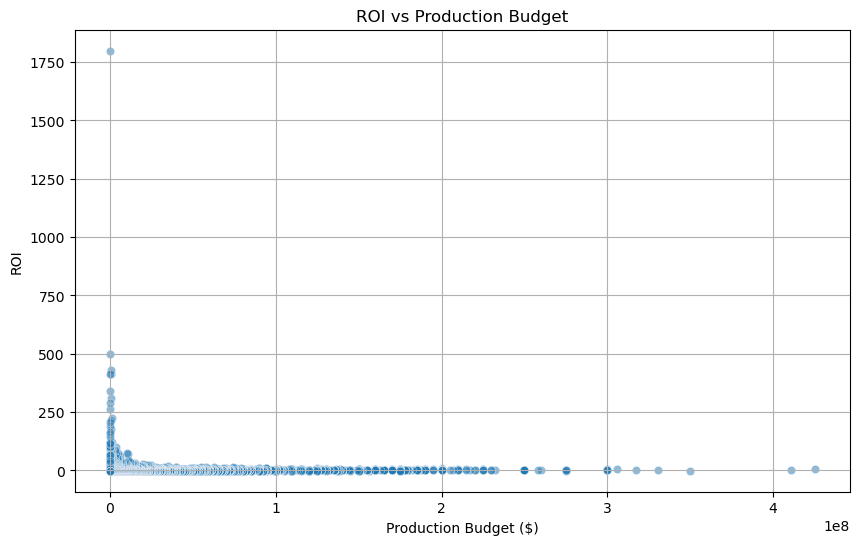

In [157]:
#plot ROI vs Budget

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_budget, x='production_budget', y='ROI', alpha=0.5)
plt.title('ROI vs Production Budget')
plt.xlabel('Production Budget ($)')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11080\765958875.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_roi = df_budget.groupby('budget_range')['ROI'].mean().sort_values(ascending=False)


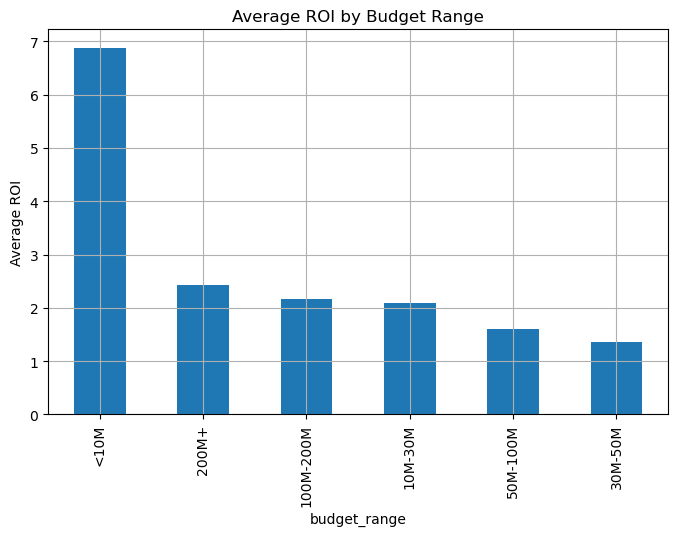

budget_range
<10M         6.877582
200M+        2.437574
100M-200M    2.164028
10M-30M      2.086778
50M-100M     1.594578
30M-50M      1.365276
Name: ROI, dtype: float64

In [158]:
# Create bins for budget ranges
df_budget['budget_range'] = pd.cut(df_budget['production_budget'],
                                  bins=[0, 10e6, 30e6, 50e6, 100e6, 200e6, df_budget['production_budget'].max()],
                                  labels=['<10M', '10M-30M', '30M-50M', '50M-100M', '100M-200M', '200M+'])

# Calculate average ROI per bin
avg_roi = df_budget.groupby('budget_range')['ROI'].mean().sort_values(ascending=False)

# Plot
avg_roi.plot(kind='bar', figsize=(8,5), title='Average ROI by Budget Range')
plt.ylabel("Average ROI")
plt.grid(True)
plt.show()

avg_roi

## Descriptive Statistics per budget range

In [160]:
df_budget.groupby('budget_range')['ROI'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_11080\2998107489.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_budget.groupby('budget_range')['ROI'].describe()


,count,mean,std,min,25%,50%,75%,max
budget_range,,,,,,,,
<10M,2247.0,6.877582,46.976371,-1.000000,-0.947840,0.142509,3.635304,1799.000000
10M-30M,1700.0,2.086778,4.852164,-1.000000,-0.363918,0.676815,2.604241,74.520507
30M-50M,754.0,1.365276,2.409183,-1.000000,-0.237107,0.697077,2.158194,18.927371
50M-100M,718.0,1.594578,2.376495,-1.000000,0.031583,1.021390,2.258444,15.489089
100M-200M,322.0,2.164028,1.859169,-1.000000,0.828484,1.786778,3.243345,10.041042
200M+,41.0,2.437574,1.737472,-0.572108,1.186957,2.427135,3.153696,6.669092


### ANOVA Test


In [162]:
from scipy.stats import f_oneway


roi_groups = [group['ROI'].dropna().values for name, group in df_budget.groupby('budget_range')]
f_stat, p_value = f_oneway(*roi_groups)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")

F-statistic: 8.12
P-value: 0.00000


C:\Users\User\AppData\Local\Temp\ipykernel_11080\1809378763.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roi_groups = [group['ROI'].dropna().values for name, group in df_budget.groupby('budget_range')]


With a p-value of 0.00000, we reject the null hypothesis that all budget ranges have the same average ROI. This confirms that at least one budget range has a significantly different mean ROI. This supports the idea that production budget influences ROI, though further post-hoc analysis (e.g., Tukey’s test) would be needed to pinpoint which specific groups differ.

## Linear Regression

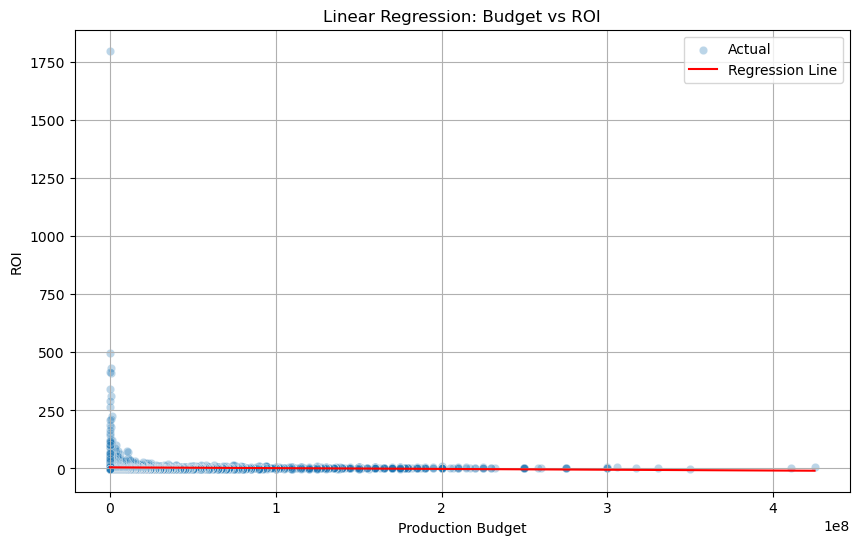

In [165]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = df_budget[['production_budget']]
y = df_budget['ROI']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
df_budget['predicted_ROI'] = model.predict(X)

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='production_budget', y='ROI', data=df_budget, alpha=0.3, label='Actual')
plt.plot(df_budget['production_budget'], df_budget['predicted_ROI'], color='red', label='Regression Line')
plt.title("Linear Regression: Budget vs ROI")
plt.xlabel("Production Budget")
plt.ylabel("ROI")
plt.legend()
plt.grid(True)
plt.show()

In [166]:
print(f"R² score: {model.score(X, y):.4f}")

R² score: 0.0024


While a linear regression was fitted to model the relationship between production budget and ROI, the resulting regression line was nearly flat (close to ROI = 0), and the R² score was extremely low (0.0024). 

This suggests that ROI does not follow a linear relationship with production budget. Instead, returns tend to be more favorable at the lowest budget levels, but increasingly volatile and less predictable as budget increases. A nonlinear model or categorical analysis based on budget ranges may yield better insights.

## Chi-Sqaure Test

The Chi-Square test checks whether success rates are independent of budget range. A low p-value indicates that certain budget ranges are more likely to yield successful films, reinforcing the ROI trends.

In [170]:
import scipy.stats as stats

# Define success
df_budget['success'] = df_budget['ROI'] > 1

# Create contingency
contingency = pd.crosstab(df_budget['budget_range'], df_budget['success'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-Square: {chi2:.2f}, p-value: {p:.5f}")


Chi-Square: 120.95, p-value: 0.00000


The very low p-value indicates a statistically significant relationship between budget range and success rate. This suggests that certain budget ranges are more likely to produce successful films, reinforcing the idea that budget plays a critical role in ROI outcomes.

## T-Test

The A/B test compares mean ROI between low and high budget films. A significant result could suggest budget allocation strategies for maximizing ROI.

In [174]:
from scipy.stats import ttest_ind

# Create groups
low_budget = df_budget[df_budget['budget_range'] == '<10M']['ROI']
high_budget = df_budget[df_budget['budget_range'] == '200M+']['ROI']

# T-test
t_stat, p_val = ttest_ind(low_budget, high_budget, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.5f}")

T-statistic: 4.32, p-value: 0.00002


Since the p-value is well below 0.05, we reject the null hypothesis. This indicates a statistically significant difference in average ROI between low-budget and high-budget films. In fact, low-budget films tend to have much higher ROI on average, which is aligned with the earlier descriptive statistics.


**CONCLUSION**

Our analysis reveals that production budget significantly impacts ROI distribution across films, but not in a linear way. While high-budget films may be more likely to earn large grosses, they do not necessarily produce better returns. Low-budget films, despite their limitations, tend to deliver higher ROI on average. Linear regression failed to explain ROI well, suggesting that other factors — such as genre, release timing, or marketing — may play a larger role. These findings can help guide budget allocation decisions in film production.

# Conclusions

1. Releasing a movie between the holiday and non-holiday season actually doesn't affect the popularity, but for domestic income and worldwide income, it does affect. so when releasing movies, it's better to release them during the holiday seasons.

2. Releasing a movie between the holiday and non-holiday season actually doesn't affect the popularity, but for domestic income and worldwide income, it does affect. so when releasing movies, it's better to release them during the holiday seasons.


3. Our analysis reveals that production budget significantly impacts ROI distribution across films, but not in a linear way. While high-budget films may be more likely to earn large grosses, they do not necessarily produce better returns. Low-budget films, despite their limitations, tend to deliver higher ROI on average.

# Recommendations

1.  Focus on Profitable Genres, Not Just Popular Ones

2. When releasing a movie we should plan on release during the holiday season this will increase our revenue

3. Focus on producing mid- to low-budget films that have strong market potential, as they tend to yield higher ROI compared to high-budget productions. 

                                                    **The End**